# Oasis Infobytes : Data Science Internship

## Task 3 : CAR PRICE PREDICTION WITH MACHINE LEARNING

### Intern's Name : Sujeet R. Patil

#### Batch - March P-2 OIBSIP.

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Loading the Dataset

In [2]:
car = pd.read_csv("C:/Users/HP/Desktop/car_price.csv")

## Data Inspecting and understanding the dataset

In [3]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
car.duplicated().sum()

0

In [8]:
print(car.fueltype.value_counts())
print(car.aspiration.value_counts())
print(car.doornumber.value_counts())
print(car.carbody.value_counts())
print(car.drivewheel.value_counts())
print(car.enginelocation.value_counts())
print(car.enginetype.value_counts())
print(car.cylindernumber.value_counts())
print(car.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


## Encoding the Categorical Data

In [9]:
car['fueltype'].replace({"gas":0, "diesel":1},inplace = True)
car['aspiration'].replace({"std":0, "turbo":1},inplace = True)
car['doornumber'].replace({"four":0, "two":1}, inplace = True)
car['carbody'].replace({"sedan":0, "hatchback":1, "wagon":2,"hardtop":3, "convertible":4}, inplace = True)
car['drivewheel'].replace({"fwd":0, "rwd":1,"4wd":2}, inplace = True)
car['enginelocation'].replace({"front":0, "rear":1}, inplace = True)
car['enginetype'].replace({"ohc":0, "ohcf":1,"ohcv":2,"dohc":3,"l":4,"rotor":5,"dohcv":6}, inplace = True)
car['cylindernumber'].replace({"four":0, "six":1,"five":3,"eight":4,"two":5,"three":6,"twelve":7}, inplace = True)
car['fuelsystem'].replace({"mpfi":0, "2bbl":1,"idi":2,"1bbl":3,"spdi":4,"4bbl":5,"mfi":6,"spfi":7}, inplace = True)

In [10]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,0,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,0,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,0,0,1,0,109.1,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,0,1,0,0,1,0,109.1,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,0,0,0,0,1,0,109.1,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,1,1,0,0,1,0,109.1,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data Modeling

In [11]:
#splitting data into x and y
x = car.drop(['car_ID','symboling','CarName','price'], axis = 1)
y = car['price']

In [12]:
x.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,0,1,4,1,0,88.6,168.8,64.1,48.8,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
1,0,0,1,4,1,0,88.6,168.8,64.1,48.8,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
2,0,0,1,1,1,0,94.5,171.2,65.5,52.4,...,1,152,0,2.68,3.47,9.0,154,5000,19,26
3,0,0,0,0,0,0,99.8,176.6,66.2,54.3,...,0,109,0,3.19,3.40,10.0,102,5500,24,30
4,0,0,0,0,2,0,99.4,176.6,66.4,54.3,...,3,136,0,3.19,3.40,8.0,115,5500,18,22


In [13]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

## Linear regression

In [15]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [16]:
#training data prediction
training_data_prediction = lr_model.predict(x_train)

In [17]:
error_1 = metrics.r2_score(y_train, training_data_prediction)

In [18]:
print('R2 Squared Error of Training Data:', error_1)

R2 Squared Error of Training Data: 0.9049736408284828


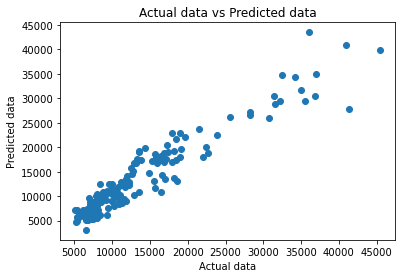

In [19]:
#Visualization of predicted and actual training data
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual data vs Predicted data')
plt.show()

In [20]:
#testing data prediction
test_data_prediction = lr_model.predict(x_test)

In [21]:
error_2 = metrics.r2_score(y_test, test_data_prediction)

In [22]:
print('R2 Squared Score of Testing Data:', error_2)

R2 Squared Score of Testing Data: 0.7436355433459798


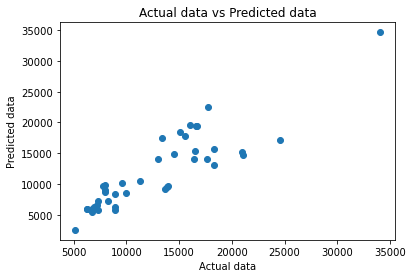

In [23]:
#visualization of actual and predicted testing data
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual data vs Predicted data')
plt.show()

# Thank You !!!